# Week 3 Lab Assignment: Applying SEMMA and Model Comparison

### Objective
In this lab, you will apply the SEMMA (Sample, Explore, Modify, Model, Assess) methodology to a dataset. You will implement and compare different machine learning models to determine which one performs best for a specific business problem.

### 1. Dataset Overview
You will work with a dataset related to customer churn. The dataset contains information about customers' demographics, account details, and service usage. Your task is to predict which customers are likely to churn.

**Dataset Name:** `customer_churn.csv`

**Attributes:**
- `CustomerID`: Unique identifier for each customer.
- `Gender`: Gender of the customer (Male/Female).
- `Age`: Age of the customer.
- `Tenure`: Number of months the customer has been with the company.
- `ServiceType`: Type of service (Internet/Phone).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer has churned (Yes/No).

### 2. Sample and Explore
**Objective:** Understand the dataset and identify key variables.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns (`Age`, `Tenure`, `MonthlyCharges`, `TotalCharges`).
4. **Visualize the Data:** Create visualizations to explore the relationships between variables, especially in relation to customer churn.

In [1]:
# Import necessary packages
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.0/11.0 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


   CustomerID  Gender  Age  Tenure ServiceType  MonthlyCharges  TotalCharges  \
0           1  Female   45      12    Internet           70.35         842.2   
1           2    Male   34      24       Phone           45.50        1085.4   
2           3  Female   50      36    Internet           90.00        3240.0   
3           4  Female   29       6       Phone           35.75         214.5   
4           5    Male   23      12    Internet           56.15         673.8   

  Churn  
0    No  
1   Yes  
2    No  
3   Yes  
4    No  
CustomerID        0
Gender            0
Age               0
Tenure            0
ServiceType       0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64
       CustomerID        Age     Tenure  MonthlyCharges  TotalCharges
count   25.000000  25.000000  25.000000       25.000000     25.000000
mean    13.000000  42.360000  20.640000       62.680000   1351.420000
std      7.359801  12.099862  12.619033       19.849491   1011.352063
min   

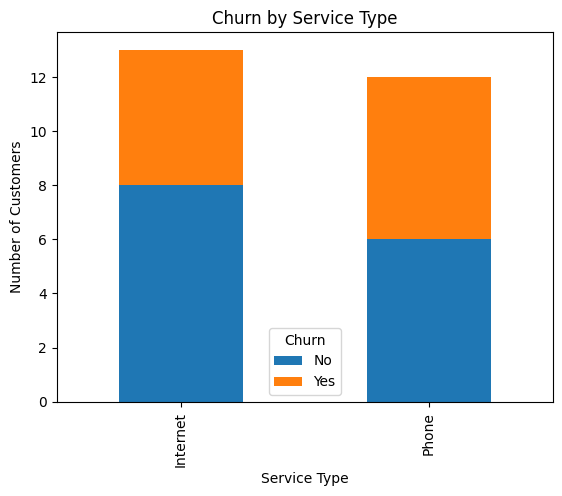

In [2]:
# Load the dataset
df = pd.read_csv('customer_churn.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

# Visualize churn by service type
df.groupby('ServiceType')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Number of Customers')
plt.show()

### 3. Modify
**Objective:** Prepare the data for modeling.

**Tasks:**
1. **Handle Missing Values:** Deal with any missing values in the dataset.
2. **Feature Engineering:** Create new features if necessary (e.g., converting `TotalCharges` to a numeric format if it's stored as a string).
3. **Encoding Categorical Variables:** Convert categorical variables (like `Gender`, `ServiceType`, `Churn`) into numeric format using techniques like one-hot encoding.

In [3]:
# Handle missing values by dropping rows with missing data
df = df.dropna()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'ServiceType'], drop_first=True)

# Encode the target variable (Churn)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### 4. Model
**Objective:** Implement different models to predict customer churn.

**Tasks:**
1. **Train-Test Split:** Split the dataset into training and testing sets.
2. **Implement Models:** Implement at least two models (e.g., Decision Tree, Random Forest, Gradient Boosting).
3. **Evaluate Performance:** Use appropriate metrics (e.g., accuracy, precision, recall) to evaluate the performance of each model.

In [4]:
# Split the data into training and testing sets
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Implement Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Implement Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluate models
models = {'Decision Tree': dt_preds, 'Random Forest': rf_preds, 'Gradient Boosting': gb_preds}
for model_name, preds in models.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds)}")
    print(f"Precision: {precision_score(y_test, preds)}")
    print(f"Recall: {recall_score(y_test, preds)}")
    print()

Model: Decision Tree
Accuracy: 0.5
Precision: 1.0
Recall: 0.3333333333333333

Model: Random Forest
Accuracy: 0.375
Precision: 1.0
Recall: 0.16666666666666666

Model: Gradient Boosting
Accuracy: 0.25
Precision: 0.0
Recall: 0.0



C:\Users\jason\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5. Assess
**Objective:** Compare the models and select the best one.

**Task:** Based on the evaluation metrics, choose the best model for predicting customer churn. Justify your choice based on the results and the business context.

**Example Assessment:**
- "Based on the evaluation metrics, the Random Forest model performs best with the highest accuracy and precision. Given the importance of correctly identifying customers at risk of churn, Random Forest's ability to handle complex relationships in the data makes it the preferred model."

### 6. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, visualizations, and model comparison.
- A brief report (1-2 paragraphs) summarizing your findings and model selection.

**Deadline:** Submit your completed notebook and report to the course portal by end of class.